In [18]:
import tensorflow as tf

print("GPU disponible:", tf.config.list_physical_devices('GPU'))

# Instalar librerías adicionales si es necesario
!pip install seaborn plotly

# Importaciones estándar
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report
from pandas.plotting import scatter_matrix
import warnings
warnings.filterwarnings('ignore')

# Configuración de visualización
plt.style.use('default')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (10, 6)
plt.rcParams['font.size'] = 12

print("Entorno configurado correctamente en Google Colab")


GPU disponible: []
Entorno configurado correctamente en Google Colab


In [19]:
# Cargo dataset Iris
import seaborn as sns

df = sns.load_dataset("iris")
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


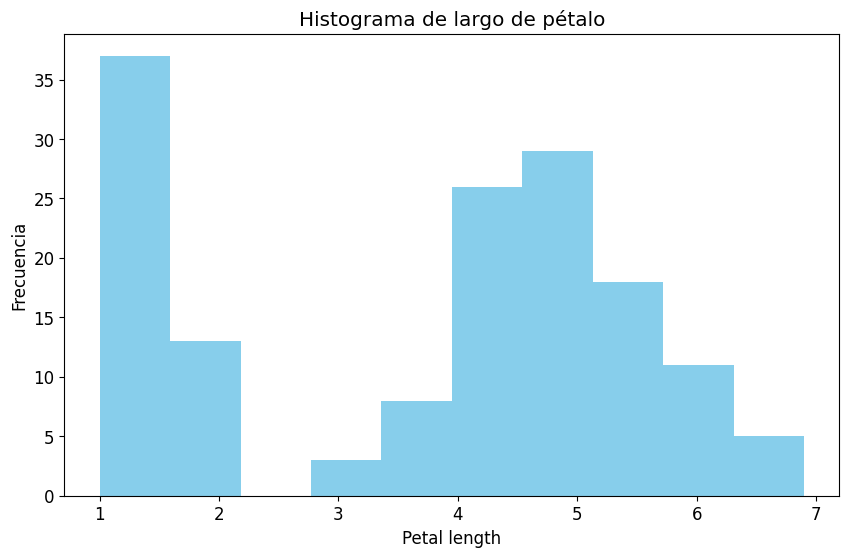

In [20]:
#Análisis exploratorio - Histrograma - Gráfico básico
plt.hist(df["petal_length"], color="skyblue")
plt.xlabel("Petal length")
plt.ylabel("Frecuencia")
plt.title("Histograma de largo de pétalo")
plt.show()

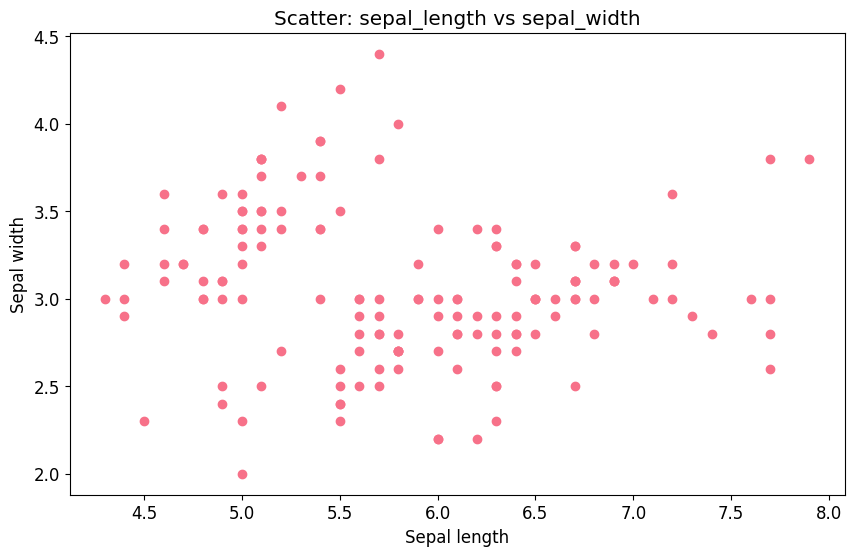

In [21]:
#Análisis exploratorio - Gráfico de dispersión - Gráfico básico
plt.scatter(df["sepal_length"], df["sepal_width"])
plt.xlabel("Sepal length")
plt.ylabel("Sepal width")
plt.title("Scatter: sepal_length vs sepal_width")
plt.show()

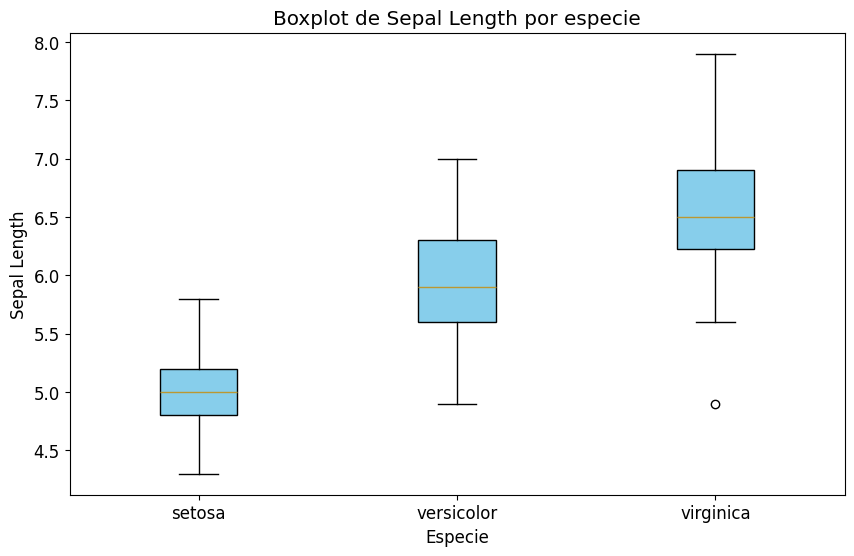

In [22]:
#Análisis exploratorio - Boxplot - Gráfico básico
# Boxplot de sepal_length por especie

data = [df[df["species"] == sp]["sepal_length"] for sp in df["species"].unique()]

plt.boxplot(
    data,
    patch_artist=True,   # Permite color
    boxprops=dict(facecolor="skyblue")  # Color celeste
)

plt.xticks(range(1, len(data)+1), df["species"].unique())
plt.title("Boxplot de Sepal Length por especie")
plt.suptitle("")   # Quitar título doble
plt.xlabel("Especie")
plt.ylabel("Sepal Length")
plt.show()

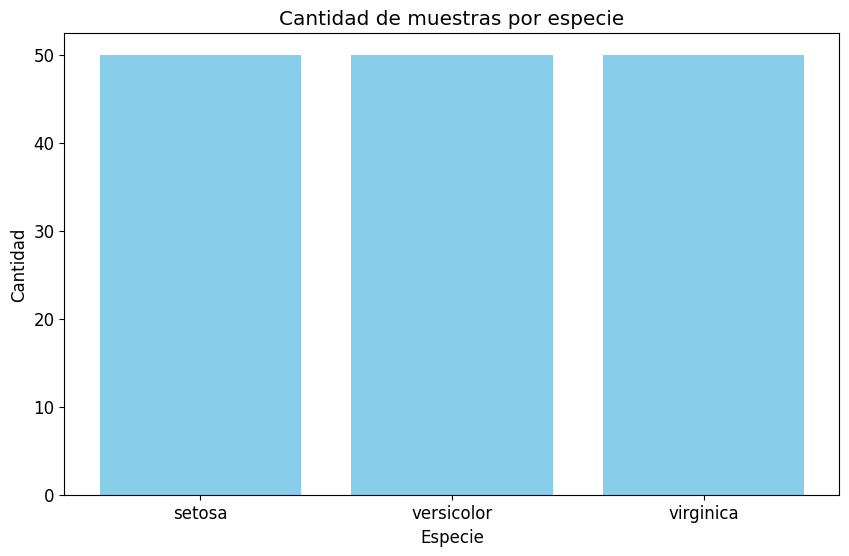

In [23]:
#Análisis exploratorio - Barras - Gráfico básico
conteo = df["species"].value_counts()

plt.bar(conteo.index, conteo.values, color="skyblue")  # color celeste
plt.title("Cantidad de muestras por especie")
plt.ylabel("Cantidad")
plt.xlabel("Especie")
plt.show()

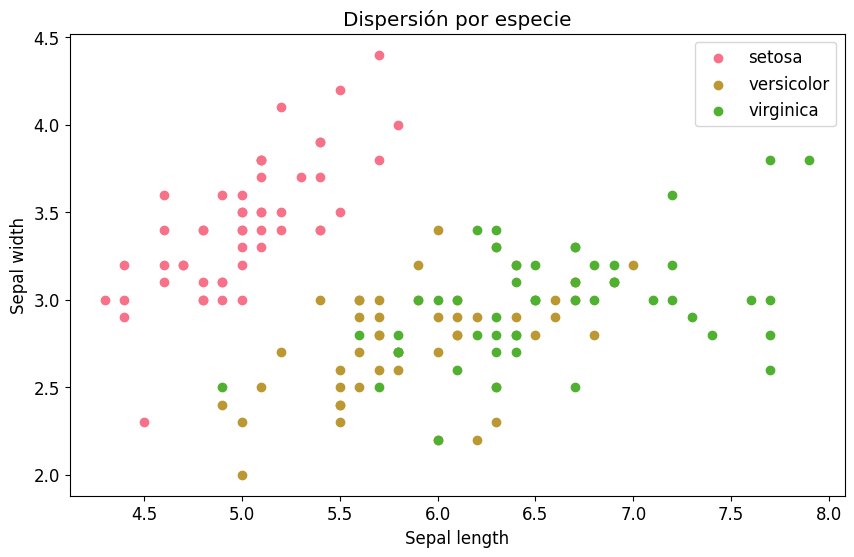

In [24]:
#Análisis exploratorio - Gráfico de dispersión por colores - Gráfico avanzado
especies = df["species"].unique()

for especie in especies:
    temp = df[df["species"] == especie]
    plt.scatter(temp["sepal_length"], temp["sepal_width"], label=especie)

plt.xlabel("Sepal length")
plt.ylabel("Sepal width")
plt.title("Dispersión por especie")
plt.legend()
plt.show()

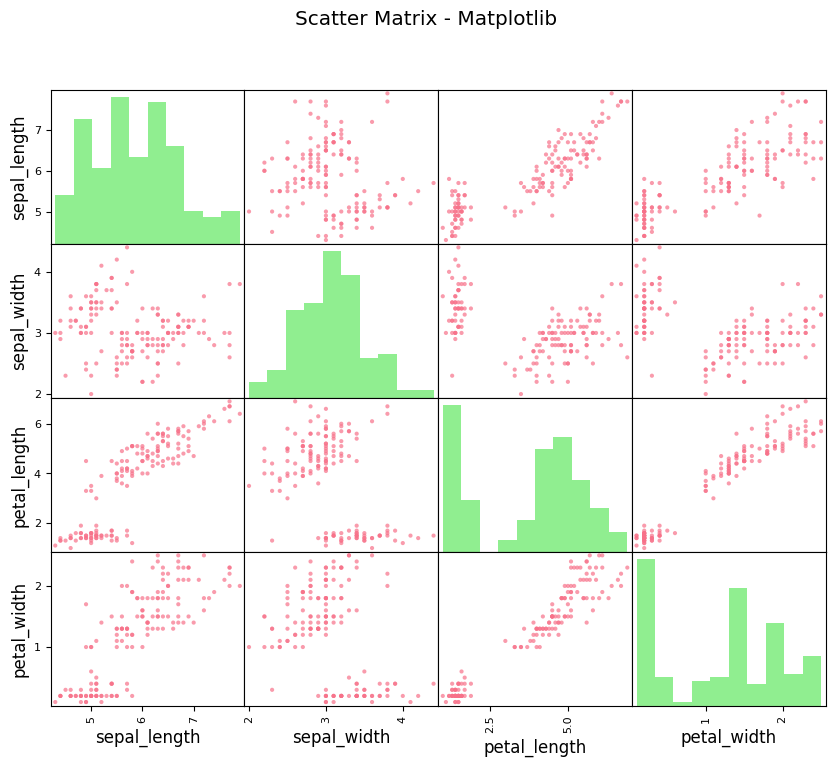

In [25]:
#Análisis exploratorio - Gráfico de pares - Gráfico avanzado
# Crear scatter_matrix
axes = scatter_matrix(df.iloc[:, :4], figsize=(10, 8), diagonal='hist', alpha=0.7)

# Personalizar colores
for i in range(len(axes)):
    for j in range(len(axes)):
        ax = axes[i, j]
        if i == j:
            # Histogramas en la diagonal → verde claro
            for patch in ax.patches:
                patch.set_facecolor('lightgreen')
        else:
            # Scatterplots fuera de la diagonal → celeste
            for line in ax.get_lines():
                line.set_color('skyblue')

plt.suptitle("Scatter Matrix - Matplotlib")
plt.show()

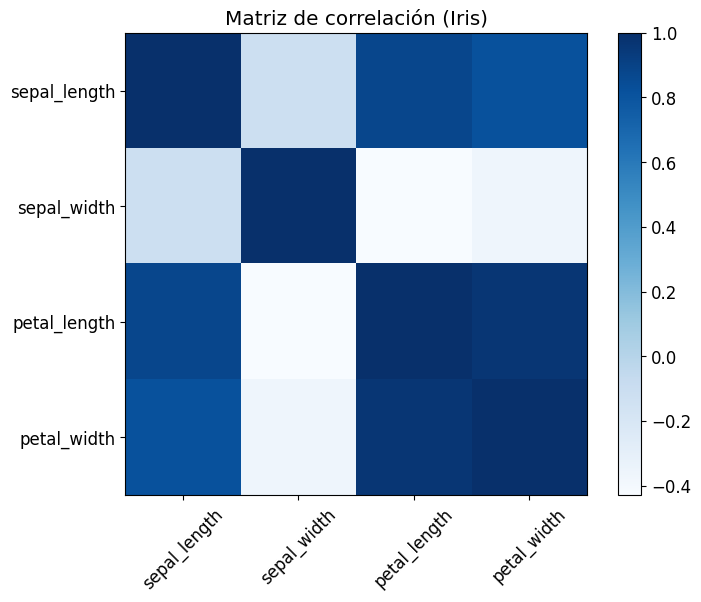

In [26]:
#Análisis exploratorio - Mapa de calor/matriz de correlación - Gráfico avanzado
corr = df.iloc[:, :4].corr()

plt.figure(figsize=(8, 6))
plt.imshow(corr, cmap="Blues")  # degradado azul
plt.colorbar()
plt.xticks(range(len(corr.columns)), corr.columns, rotation=45)
plt.yticks(range(len(corr.columns)), corr.columns)
plt.title("Matriz de correlación (Iris)")
plt.show()

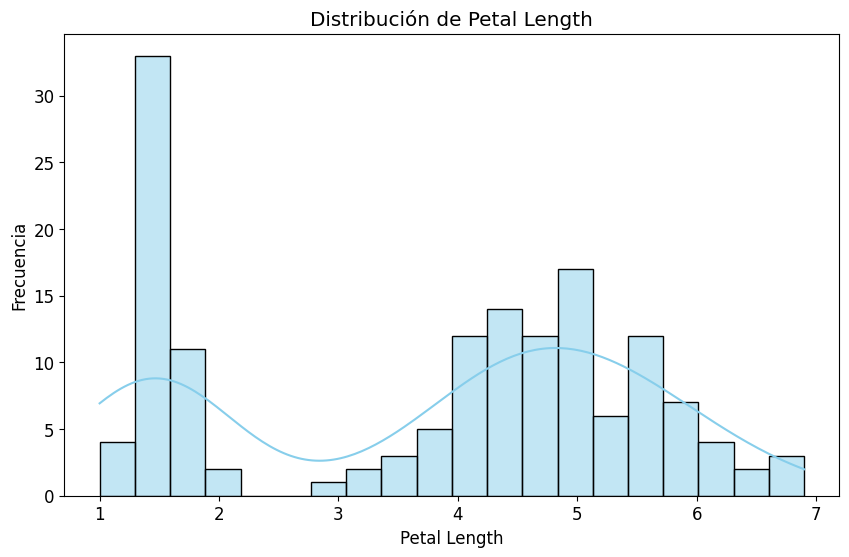

In [27]:
#Visualizaciones estadísticas - Histograma y KDE (Kernel Density Estimate)
sns.histplot(df["petal_length"], kde=True, bins=20, color="skyblue")
plt.title("Distribución de Petal Length")
plt.xlabel("Petal Length")
plt.ylabel("Frecuencia")
plt.show()

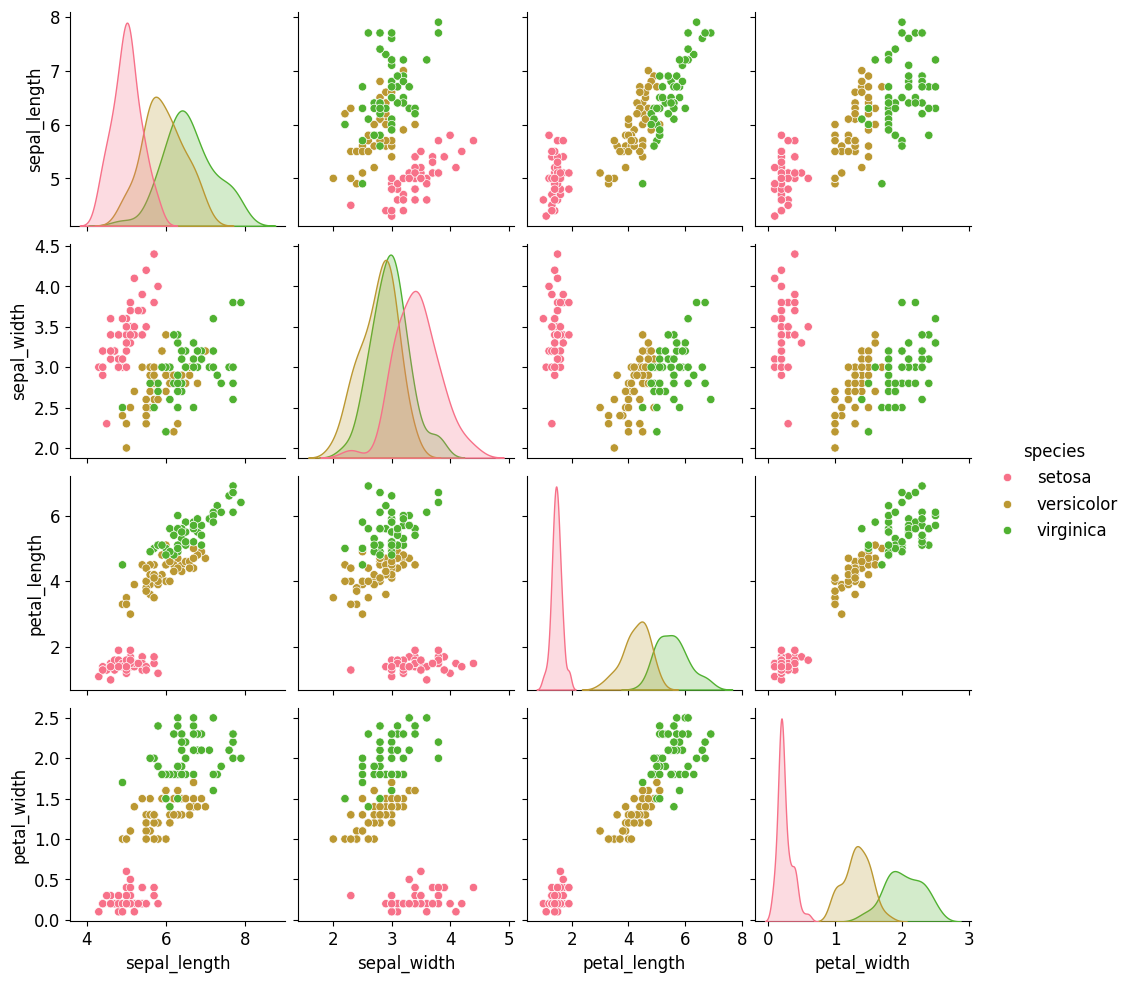

In [28]:
#Visualizaciones estadísticas - Pairplot (gráfico de pares)
sns.pairplot(df, hue="species", diag_kind="kde")
plt.show()

In [29]:
#Gráficos interactivos básicos - Scatter plot 2D
import plotly.express as px

fig = px.scatter(df,
                 x="sepal_length",
                 y="sepal_width",
                 color="species",
                 size="petal_length",  # tamaño de los puntos
                 hover_data=["petal_width"])  # info al pasar el cursor
fig.update_layout(title="Sepal Length vs Sepal Width (Iris)")
fig.show()

In [30]:
#Gráficos interactivos básicos - Histogramas interactivos
fig = px.histogram(df,
                   x="petal_length",
                   color="species",
                   nbins=20,
                   barmode="overlay",
                   marginal="box")  # agrega boxplot arriba

fig.update_layout(title="Distribución de Petal Length por especie")
fig.show()

In [31]:
#Gráficos interactivos avanzado - Boxplot interactivo
fig = px.box(df,
             x="species",
             y="petal_length",
             color="species",
             points="all")  # muestra todos los puntos

fig.update_layout(title="Boxplot Interactivo de Petal Length por especie")
fig.show()